In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt

%matplotlib inline

In [2]:
auctions = pd.read_csv("auctions.csv", dtype={"platform":"int8", "ref_type_id":"int8", "source_id":"int8"})

In [4]:
auctions["date"] =  pd.to_datetime(auctions["date"], errors = "coerce")

In [3]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [15]:
auctions["Ambas plataformas"] = 1
auctions["fecha"] = auctions["date"].dt.date

In [19]:
df_to_plot = auctions.groupby("fecha").agg({"Ambas plataformas":"count"})
df_to_plot["Plataforma 1"] = auctions.loc[auctions['platform'] == 1].groupby("fecha").agg({"cantidad":"count"})
df_to_plot["Plataforma 2"] = auctions.loc[auctions['platform'] == 2].groupby("fecha").agg({"cantidad":"count"})

Text(0.5, 1.0, 'Cantidad de subastas registradas por día')

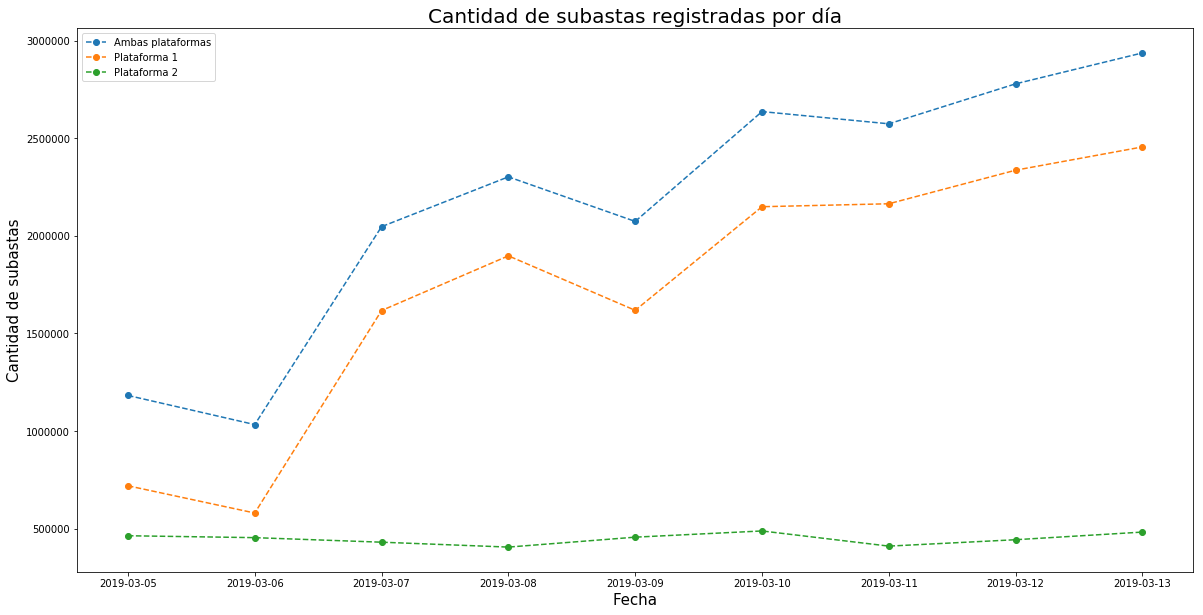

In [21]:
plot = df_to_plot.plot(figsize=(20,10), style = 'o--', legend = True);
plot.set_xlabel("Fecha", fontsize = 15)
plot.set_ylabel("Cantidad de subastas", fontsize = 15)
plot.set_title("Cantidad de subastas registradas por día", fontsize = 20)

In [ ]:
group_device_id = auctions.groupby("device_id").agg({'date': lambda x: list(x)}) #se podrian filtrar los q tengan solo un date en la lista\
#para ahorrar memoria

In [ ]:
def set_range(lista):
    cant_rango_a = 0  #Cantidad de veces que un usuario tardó al menos 6hs en volver a aparecer en una subasta
    cant_rango_b = 0  #Cantidad de veces que un usuario tardó al menos 12hs en volver a aparecer en una subasta
    cant_rango_c = 0  #Cantidad de veces que un usuario tardó al menos 18hs en volver a aparecer en una subasta
    cant_rango_d = 0  #Cantidad de veces que un usuario tardó al menos 24hs en volver a aparecer en una subasta
    for elem in lista:
        sublist_ord = elem.sort()
        for i in range(len(sublist_ord) - 1):
            if (sublista_ord[i+1] - sublista_ord[i]).astype('timedelta64[h]') >= 6:
                
            

In [1]:
import pandas
df = pandas.DataFrame(columns=['to','fr','ans'])
df.to = [pandas.Timestamp('2014-01-24 13:03:12.050000'), pandas.Timestamp('2014-01-27 11:57:18.240000'), pandas.Timestamp('2014-01-23 10:07:47.660000')]
df.fr = [pandas.Timestamp('2014-01-26 23:41:21.870000'), pandas.Timestamp('2014-01-27 15:38:22.540000'), pandas.Timestamp('2014-01-23 18:50:41.420000')]

In [3]:
(df.fr-df.to).astype('timedelta64[h]')

0    58.0
1     3.0
2     8.0
dtype: float64